# 안면인식 

## SVM : Support Vector Machine :  
클래스 사이에 단순히 폭이 0인 선을 그리는 것이 아니라 가 선에 주변의 가장 가까운 점에 이르는 너비의 마진 Margin을 그림으로써 이 Margin을 극대화하는 선이 최적의 모델이 되며, SVM은 이러한 마진 추정기의 대표적인 예 

In [8]:
from sklearn.datasets import fetch_lfw_people

`fetch_lfw_people()` 함수를 불러올 때 EOFError 발생   
-> libjpeg 설치로 해결 but 해당 소스는 python module이 아니기 때문에 pip 을 사용할 수 없음.   
!brew install libjpeg 

In [2]:
faces = fetch_lfw_people(min_faces_per_person=60)

In [3]:
print(faces.target_names)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']


In [4]:
print(faces.images.shape)

(1348, 62, 47)


In [54]:
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import warnings

warnings.filterwarnings('ignore')

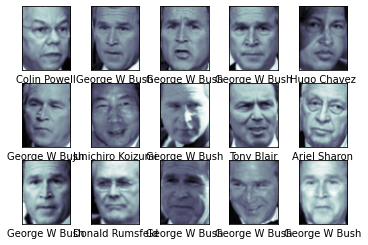

In [10]:
fig, ax = plt.subplots(3,5)

for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
           xlabel = faces.target_names[faces.target[i]])

In [14]:
from sklearn.svm import SVC #classifier
from sklearn.decomposition import PCA as RandomizedPCA # 옵션 svd_solver='randomized'
from sklearn.pipeline import make_pipeline

In [21]:
pca = RandomizedPCA(svd_solver='randomized', n_components = 150, whiten = True, random_state = 42)
svc = SVC(kernel ='rbf', class_weight = 'balanced')

SVM은 커널 kernel과 결합하면 더욱 강해짐.   
`kernel = 'rbf'` : RBF (radial basis function, 방사형 기저 함수) 

In [22]:
model = make_pipeline(pca, svc)

In [23]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data,
                                               faces.target, random_state =42)

In [24]:
from sklearn.model_selection import GridSearchCV 

param_grid = {'svc__C' : [1,5,10,50],
             'svc__gamma':[0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)

CPU times: user 1min 4s, sys: 792 ms, total: 1min 5s
Wall time: 36.6 s


GridSearchCV(estimator=Pipeline(steps=[('pca',
                                        PCA(n_components=150, random_state=42,
                                            svd_solver='randomized',
                                            whiten=True)),
                                       ('svc', SVC(class_weight='balanced'))]),
             param_grid={'svc__C': [1, 5, 10, 50],
                         'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]})

In [25]:
grid.best_params_

{'svc__C': 10, 'svc__gamma': 0.001}

In [26]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

Text(0.5, 0.98, 'Predicted Names ; Incorrect Labels in Red')

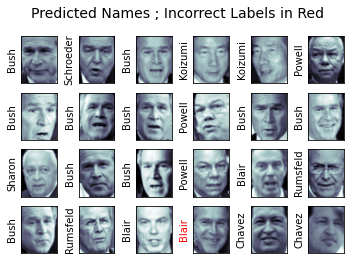

In [29]:
fig, ax = plt.subplots(4,6)

for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62,47), cmap ='bone')
    axi.set(xticks = [], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                  color = 'black' if yfit[i] == ytest[i] else 'red')

fig.suptitle('Predicted Names ; Incorrect Labels in Red', size =14)

In [32]:
from sklearn.metrics import classification_report

print(classification_report(ytest, yfit, target_names = faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.73      0.69        15
     Colin Powell       0.80      0.87      0.83        68
  Donald Rumsfeld       0.74      0.84      0.79        31
    George W Bush       0.92      0.83      0.88       126
Gerhard Schroeder       0.86      0.83      0.84        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.92      1.00      0.96        12
       Tony Blair       0.85      0.95      0.90        42

         accuracy                           0.85       337
        macro avg       0.83      0.84      0.84       337
     weighted avg       0.86      0.85      0.85       337



In [35]:
from sklearn.metrics import confusion_matrix

mat =confusion_matrix(ytest, yfit)

Text(91.68, 0.5, 'predicted label')

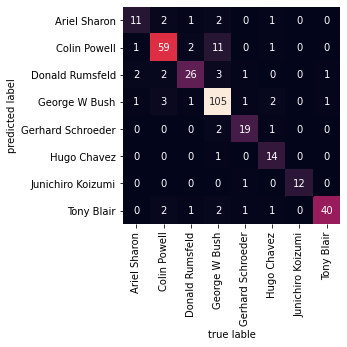

In [39]:
sns.heatmap(mat.T, square= True, annot = True, fmt ='d', cbar =False,
            xticklabels = faces.target_names, yticklabels = faces.target_names)

plt.xlabel('true lable')
plt.ylabel('predicted label')

### OpenCV

일반적으로 이미지, 그중에서도 특히 얼굴에 대해 최신 특징 추출 도구를 미리 훈련시켜 둔 정교화된 분류 알고리즘 

## 고유얼굴 

In [3]:
faces.target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Junichiro Koizumi',
       'Tony Blair'], dtype='<U17')

In [4]:
faces.images.shape

(1348, 62, 47)

In [6]:
from sklearn.decomposition import PCA as RandomizedPCA

In [7]:
pca = RandomizedPCA(150, svd_solver='randomized')

In [8]:
pca.fit(faces.data)

PCA(n_components=150, svd_solver='randomized')

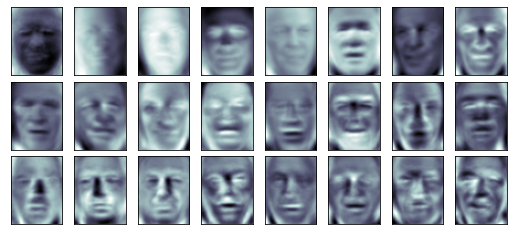

In [10]:
fig, axes = plt.subplots(3,8, figsize = (9,4),
                        subplot_kw = {'xticks' :[], 'yticks' : []},
                        gridspec_kw = dict(hspace = 0.1, wspace = 0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62,47), cmap = 'bone')

Text(0, 0.5, 'cumulative explained variance')

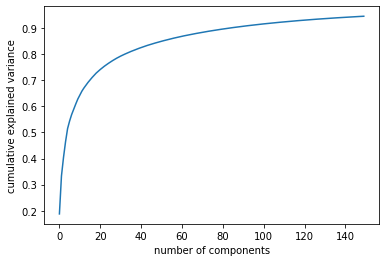

In [11]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [12]:
# 성분과 사영된 얼굴 걔산 

pca = RandomizedPCA(150,svd_solver = 'randomized').fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

Text(0, 0.5, '150 - dim\nreconstruction')

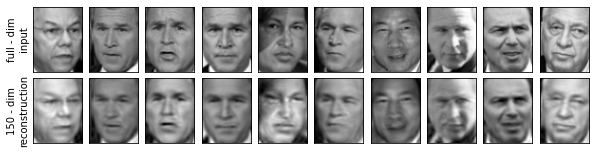

In [15]:
fig, ax  = plt.subplots(2, 10, figsize = (10, 2.5),
                       subplot_kw ={'xticks':[], 'yticks':[]},
                        gridspec_kw = dict(hspace = 0.1, wspace = 0.1))

for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62,47), cmap ='binary_r')
    ax[1, i].imshow(projected[i].reshape(62,47), cmap = 'binary_r')
    
ax[0,0].set_ylabel('full - dim\ninput')
ax[1,0].set_ylabel('150 - dim\nreconstruction')

## ISOMAP 

In [2]:
faces = fetch_lfw_people(min_faces_per_person = 30)

In [3]:
faces.data.shape

(2370, 2914)

2370 개의 이미지가 있고 각 이미지는 2914픽셀로 구성됨.  
-> 이미지를 2914차원 공간의 데이터의 점 

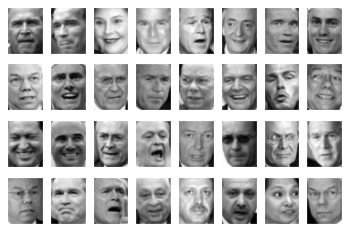

In [5]:
fig, ax = plt.subplots(4, 8, subplot_kw = dict(xticks = [], yticks =[]))

for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap = 'gray')

### 저차원 임베딩 

우선 PCA를 계산하고 설명 분산 비율을 확인해서 데이터를 설명하기 위해 얼마나 많은 선형 특징이 필요한지 알아보는 것으로 시작.

In [6]:
from sklearn.decomposition import PCA as RandomizedPCA

model = RandomizedPCA(100, svd_solver ='randomized').fit(faces.data)

Text(0, 0.5, 'cumulative variance')

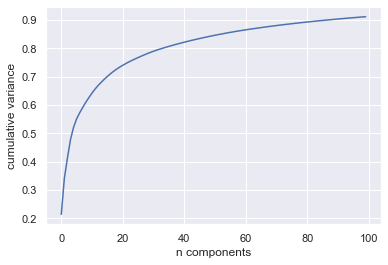

In [7]:
plt.plot(np.cumsum(model.explained_variance_ratio_))
plt.xlabel('n components')
plt.ylabel('cumulative variance')

분산의 90%를 보존하기 위해서는 거의 100개의 성분이 필요함.   
-> 본질적으로 데이터 자체가 매우 높은 차원을 가지기 때문에 단지 몇개의 성분만 가지고 선형적 설명 불가능   
-> `LLE` 나 `Isomap` 과 같은 비선형 다양체 임베딩이 도움이 될 수 있음 . 

In [8]:
from sklearn.manifold import Isomap

model = Isomap(n_components = 2)
proj = model.fit_transform(faces.data)
proj.shape

(2370, 2)

In [12]:
# 사영 위치에 이미지 섬네일 출력 

from matplotlib import offsetbox

def plot_components(data, model, images = None, ax = None, thumb_frac = 0.05, cmap = 'gray') :
    ax = ax or plt.gca()
    
    proj = model.fit_transform(data)
    ax.plot(proj[:,0], proj[:,1], '.k')
    
    if images is not None :
        min_dist_2 = (thumb_frac * max(proj.max(0) -proj.min(0))) ** 2
        shown_images = np.array([2 * proj.max(0)])
        
        for i in range(data.shape[0]):
            dist = np.sum((proj[i] - shown_images) ** 2, 1)
            
            if np.min(dist) < min_dist_2 :
                
                # 너무 가까운 점들은 보여주지 말것 
                continue
                
            shown_images = np.vstack([shown_images, proj[i]])
            imagebox = offsetbox.AnnotationBbox(offsetbox.OffsetImage(images[i], cmap = cmap), proj[i])
            
            ax.add_artist(imagebox)

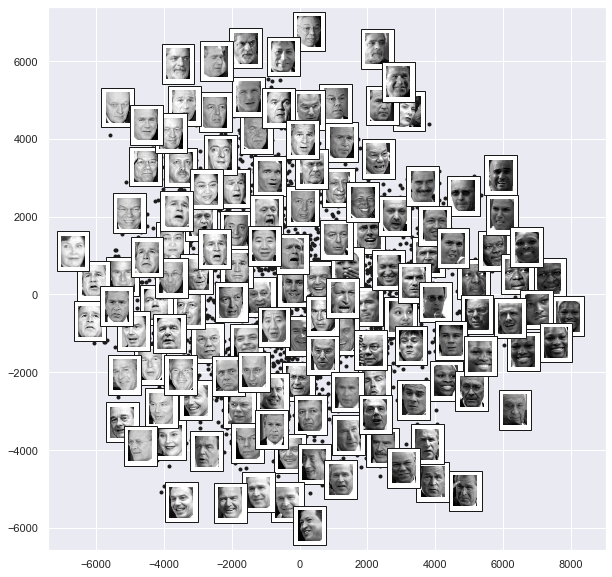

In [13]:
fig, ax = plt.subplots(figsize = (10,10))

plot_components(faces.data, model = Isomap(n_components =2),
               images = faces.images[:,::2,::2])

## 실제 HOG : 간단한 안면 인식기

In [22]:
faces = fetch_lfw_people(min_faces_per_person = 2)

### 1. 긍정 (Positive) 훈련 표본을 구성하기 위해 얼굴 이미지 섬네일을 구한다.

In [23]:
positive_patches = faces.images
positive_patches.shape

(8821, 62, 47)

fetch_lfw_people 데이터 세트 전체 loading 시도시 Runtime Error 발생으로 인해 Error가 발생하지 않을 정도만 일단 가져옴 

### 2. 부정 (Negative) 훈련 표본을 구성하기 위해 얼굴이 아닌 이미지 섬네일 구한다.

얼굴 이미지를 포함하지 않은 동일한 크기의 섬네일이 필요하다.   
이러한 이미지를 구하는 한 가지 방법은 입력 이미지 한 뭉치를 가젿가 다양한 척도로 섬네일을 추출하는 것. 

In [26]:
from skimage import data, color, feature,transform

In [27]:
imgs_to_use = ['camera','text','coins','moon','page','clock','immunohistochemistry','chelsea','coffee','hubble_deep_field']

In [29]:
images = [color.rgb2gray(getattr(data, name)()) for name in imgs_to_use]

In [30]:
from sklearn.feature_extraction.image import PatchExtractor

In [33]:
def extract_patches(img, N, scale = 1.0 , patch_size = positive_patches[0].shape):
    extracted_patch_size = \
    tuple((scale * np.array(patch_size)).astype(int))
    
    extractor = PatchExtractor(patch_size = extracted_patch_size, max_patches = N, random_state = 0)
    
    patches = extractor.transform(img[np.newaxis])
    
    if scale != 1:
        patches = np.array([transform.resize(patch, patch_size) for patch in patches])
        
    return patches

In [34]:
negative_patches = np.vstack([extract_patches(im, 1000, scale) for im in images for scale in [0.5, 1.0, 2.0]])

In [36]:
negative_patches.shape

(30000, 62, 47)

얼굴을 포함하지 않은 3만개의 적합한 이미지 조각을 갖게 됨. 

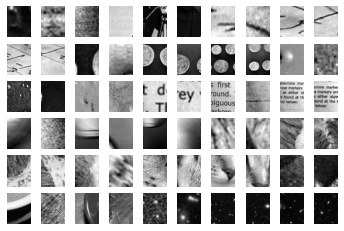

In [37]:
fig, ax = plt.subplots(6, 10)

for i, axi in enumerate(ax.flat):
    
    axi.imshow(negative_patches[500*i], cmap = 'gray')
    axi.axis('off')

### 3. 이 훈련 표본으로부터 HOG 특징을 추출 

긍정 표본과 부정 표본을 결합하여 HOG 특징을 계산한다. 

In [38]:
from itertools import chain 

In [42]:
X_train = np.array([feature.hog(im) for im in chain(positive_patches, negative_patches)])
y_train = np.zeros(X_train.shape[0])

y_train[:positive_patches.shape[0]] = 1

X_train.shape

(38821, 1215)

1,215차원의 38821개의 훈련 표본이 생겼고 이를 Scikit-learn 에 반영할 수 있는 형태가 만들어졌다. 

### 4. 이 표본에 선형 SVM 분류기를 훈련 

In [45]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

In [48]:
cross_val_score(GaussianNB(), X_train, y_train)

array([0.95106246, 0.97849047, 0.98080886, 0.98029366, 0.98016486])

In [50]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

In [51]:
grid = GridSearchCV(LinearSVC(), { 'C' : [1.0, 2.0, 4.0, 8.0]})

LinearSVC의 모수인 C의 값을 바꿔가면서 그리드 선택 

In [55]:
grid.fit(X_train, y_train)
grid.best_score_

0.9905978589909079

In [56]:
grid.best_params_

{'C': 1.0}

In [57]:
model = grid.best_estimator_
model.fit(X_train, y_train)

LinearSVC()

### 5. 새 이미지에서 얼굴을 찾는다.

이제 새로운 이미지를 가져다가 모델이 어떻게 동작하는지 확인 

(-0.5, 139.5, 159.5, -0.5)

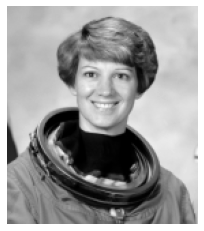

In [59]:
test_image = data.astronaut()
test_image = color.rgb2gray(test_image)
test_image = transform.rescale(test_image, 0.5)
test_image = test_image[:160, 40:180]


plt.imshow(test_image, cmap ='gray')
plt.axis('off')

In [60]:
# 이 이미지의 조각들을 순회하는 윈도웅를 만들고 각 조각의 HOG 특징을 계산 

def sliding_window(img, patch_size = positive_patches[0].shape,
                  istep = 1, jstep = 2, scale = 1.0):
    
    Ni, Nj = (int(scale * s) for s in patch_size)
    
    for i in range(0, img.shape[0] - Ni, istep):
        for j in range(0, img.shape[1]- Nj, jstep):
            patch = img[i:i + Ni, j:j+Nj]
            
            if scale !=1 :
                patch = transform.resize(patch, patch_size)
                
            yield (i, j), patch

In [61]:
indices, patches = zip(*sliding_window(test_image))

In [62]:
patches_hog = np.array([feature.hog(patch) for patch in patches])
patches_hog.shape

(4606, 1215)

In [63]:
labels = model.predict(patches_hog)
labels.sum()

96.0

#### 4606개의 조각에서 96개의 얼굴 조각을 발견했음 

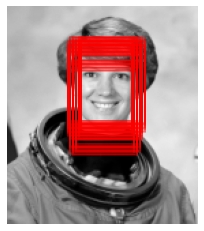

In [65]:
fig, ax = plt.subplots()
ax.imshow(test_image, cmap = 'gray')
ax.axis('off')

Ni, Nj = positive_patches[0].shape
indices = np.array(indices)

for i, j in indices[labels ==1]:
    ax.add_patch(plt.Rectangle((j, i), Nj, Ni, edgecolor = 'red',
                              alpha = 0.3, lw = 2, facecolor ='none'))